## AdaBoosting, Gradientboosting, XGBoosting Regressor

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [5]:
df = pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.shape

(301, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
df.isnull().any().any()

False

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


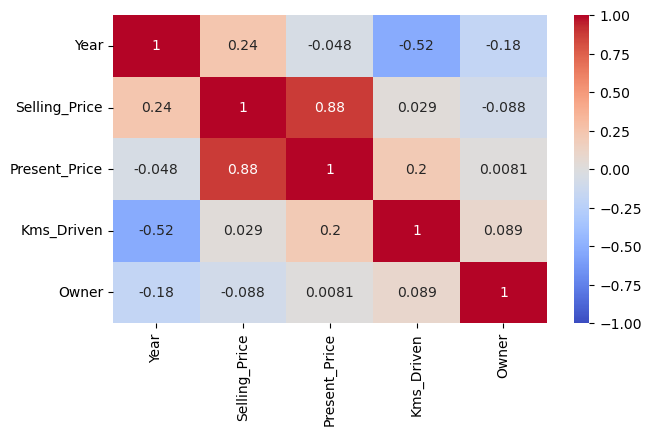

In [13]:
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

In [14]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [15]:
df["vehicle_age"] = 2022-df.Year

In [16]:
df.Car_Name.value_counts().head(10)

Car_Name
city             26
corolla altis    16
verna            14
fortuner         11
brio             10
ciaz              9
innova            9
i20               9
grand i10         8
jazz              7
Name: count, dtype: int64

In [17]:
df.drop(columns=["Car_Name", "Year"], inplace=True)

In [18]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


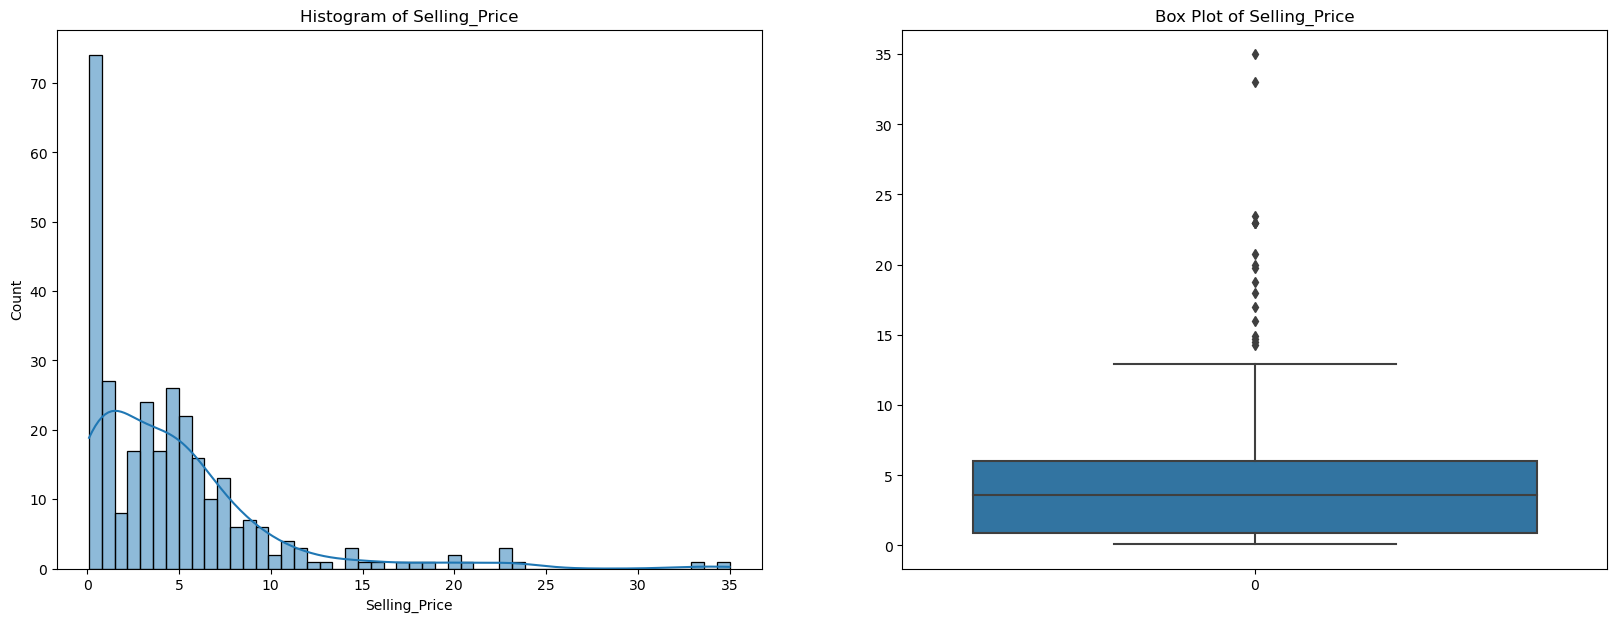

In [19]:
plt.figure(figsize=(20, 7))

plt.subplot(1, 2, 1)
plt.title("Histogram of Selling_Price")
sns.histplot(df.Selling_Price, bins=50, kde=True)
plt.subplot(1, 2, 2)
plt.title("Box Plot of Selling_Price")
sns.boxplot(df.Selling_Price)
plt.show()

## Train test split

In [20]:
from sklearn.preprocessing import OrdinalEncoder

In [21]:
df_new = df[df.Selling_Price < 10]
df_new.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [22]:
X = df_new.drop("Selling_Price", axis=1)
y = df_new.Selling_Price

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=5)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (218, 7)
Train target shape   :  (218,)
Test features shape  :  (55, 7)
Test target shape    :  (55,)


## Modeling with Pipeline for Adaboost Regressor

In [24]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


def train_val(model, X_train, y_train, X_test, y_test):

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2": r2_score(y_train, y_train_pred),
                        "mae": mean_absolute_error(y_train, y_train_pred),
                        "mse": mean_squared_error(y_train, y_train_pred, squared=True),
                        "rmse": mean_squared_error(y_train, y_train_pred, squared=False)},
              "test": {"R2": r2_score(y_test, y_pred),
                       "mae": mean_absolute_error(y_test, y_pred),
                       "mse": mean_squared_error(y_test, y_pred, squared=True),
                       "rmse": mean_squared_error(y_test, y_pred, squared=False)}}
    return pd.DataFrame(scores)

In [25]:
cat = X.select_dtypes("object").columns.to_list()
cat

['Fuel_Type', 'Seller_Type', 'Transmission']

In [26]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value',
                         unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat),
                                       remainder='passthrough',
                                       verbose_feature_names_out=False).set_output(transform="pandas")

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostRegressor

# base_estimator=DecisionTreeRegressor(max_depth=3)
operations = [("OrdinalEncoder", column_trans),
              ("Ada_model", AdaBoostRegressor(random_state=11))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

# adaboostregressor algorithm uses base_estimator=DecisionTreeRegressor(max_depth=3) by default.

# In adaboostregressor, the predictions made by each tree are weighted and the final prediction is returned.

# For example, we give an observation to the model for prediction;
# 1st tree predicted this observation at 5;
# 2nd tree predicted 7;
# 3rd tree predicted 9.

# Let's assume that the 1st tree weighs 2, the second tree weighs 1, and the third tree weighs 0.5.

# does the calculation, taking into account the weights, as follows:
# pred = (prediction of 1st tree x weight of 1st tree + estimate of 2nd tree x 2nd tree's weight +
# 3rd tree's estimate x 3rd tree weight) / (1st tree weight + 2nd tree's weight + 3rd tree's weight) )
# (5x2 + 7x1 + 9x0.5) / (2 + 1 + 0.5) = 6.14

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Fuel_Type', 'Seller_Type',
                                                   'Transmission'])],
                                   verbose_feature_names_out=False)),
                ('Ada_model', AdaBoostRegressor(random_state=11))])

```python
# base_estimator=DecisionTreeRegressor(max_depth=3)
ada_model = AdaBoostRegressor(random_state=101)
ada_model.fit(X_train, y_train)
```

In [28]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.963733,0.946141
mae,0.397661,0.436586
mse,0.261686,0.367964
rmse,0.511553,0.606600


In [29]:
y_pred_ada = pipe_model.predict(X_test)
y_pred_ada

array([0.56875   , 5.4296875 , 5.35909091, 0.56875   , 6.95478873,
       0.56875   , 3.44631579, 4.98225806, 0.7075    , 0.7075    ,
       4.98225806, 4.4262963 , 7.11851852, 4.52647059, 4.72941176,
       0.48208333, 5.625     , 4.98225806, 7.07321429, 0.53571429,
       0.56875   , 2.96036364, 4.85588235, 0.598     , 2.87096774,
       0.53571429, 1.22916667, 1.05      , 0.598     , 1.22363636,
       0.52166667, 7.0025641 , 0.56875   , 0.56875   , 4.923     ,
       0.56875   , 6.95478873, 1.4375    , 5.5862069 , 4.634     ,
       7.95220588, 4.20450704, 4.98225806, 7.02254902, 7.0025641 ,
       0.56875   , 1.22363636, 1.43      , 2.455     , 1.22916667,
       5.675     , 1.30772727, 5.3656    , 3.18461538, 3.98382353])

In [30]:
from sklearn.model_selection import cross_validate

operations = [("OrdinalEncoder", column_trans),
              ("Ada_model", AdaBoostRegressor(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'], 
                        cv=10,
                        return_train_score=True)
pd.DataFrame(scores)
pd.DataFrame(scores).mean()[2:]

# looks like it's overfitting.

test_r2                              0.917422
train_r2                             0.963272
test_neg_mean_absolute_error        -0.520943
train_neg_mean_absolute_error       -0.393707
test_neg_mean_squared_error         -0.540584
train_neg_mean_squared_error        -0.265154
test_neg_root_mean_squared_error    -0.714772
train_neg_root_mean_squared_error   -0.513041
dtype: float64

## Gridsearch for Adaboosting

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [32]:
param_grid = {"Ada_model__n_estimators": [50, 150],
              "Ada_model__learning_rate": [0.1, 0.5, 0.8, 1],
              "Ada_model__loss": ["linear", "square"]
            }

# Unlike classification it is base_estimator=DecisionTreeRegressor(max_depth=3). (In classification max_dept=1.)
# loss specifies the function to be used for calculating tree weights. Its default is linear. 
# The best loss function should be detected with Gridsearch.
# For the division condition of leaves, gini in classification and mse in regression are taken into account.

In [35]:
base_estimator = DecisionTreeRegressor(max_depth=2)

operations = [("OrdinalEncoder", column_trans),
              ("Ada_model", AdaBoostRegressor(estimator=base_estimator,
                                              random_state=101))]

model = Pipeline(steps=operations)

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs=-1,
                          return_train_score=True)

# can also be played with the base estimator hyperparameters to eliminate overfitting.
# Here we adjusted the base estimator as max_depth=2 and fixed the overfiting.

In [37]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Fuel_Type',
                                                                          'Seller_Type',
                                                                          'Transmission'])],
                                                          verbose_feature_names_out=False)),
                                       ('Ada_model',
                                        AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=2),
                                                          random_state=101))]),
             n_jobs=-1,
             param_grid={'Ada_model__learning_rate': [0.1, 0.5, 0.8, 1],
                         'Ada_model__loss': ['linear', 'square'],
                         'Ada_model__n_estimators': [50, 150]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [38]:
grid_model.best_params_

{'Ada_model__learning_rate': 1,
 'Ada_model__loss': 'square',
 'Ada_model__n_estimators': 150}

In [39]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Fuel_Type', 'Seller_Type',
                                                   'Transmission'])],
                                   verbose_feature_names_out=False)),
                ('Ada_model',
                 AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=2),
                                   learning_rate=1, loss='square',
                                   n_estimators=150, random_state=101))])

In [40]:
(pd.DataFrame(grid_model.cv_results_)
 .loc[grid_model.best_index_, ["mean_test_score", "mean_train_score"]])

mean_test_score    -0.757951
mean_train_score   -0.702549
Name: 15, dtype: object

In [41]:
prediction = grid_model.predict(X_test)

ada_rmse = mean_squared_error(y_test, prediction, squared=False)


train_val(grid_model, X_train, y_train, X_test, y_test)

# CV and test set rmse scores are very consistent.

,train,test
R2,0.930344,0.911112
mae,0.544146,0.574516
mse,0.502608,0.607285
rmse,0.708949,0.779285


## Feature importance

In [42]:
operations = [("OrdinalEncoder", column_trans),
              ("Ada_model", AdaBoostRegressor(estimator=base_estimator, 
                                              loss='square',
                                              n_estimators=150,
                                              random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Fuel_Type', 'Seller_Type',
                                                   'Transmission'])],
                                   verbose_feature_names_out=False)),
                ('Ada_model',
                 AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=2),
                                   loss='square', n_estimators=150,
                                   random_state=101))])

In [43]:
pipe_model["Ada_model"].feature_importances_

array([9.88795547e-02, 2.16275857e-03, 2.93100722e-02, 6.13593588e-01,
       1.07423290e-01, 2.76046089e-06, 1.48627976e-01])

In [44]:
features = pipe_model["OrdinalEncoder"].get_feature_names_out()
features

array(['Fuel_Type', 'Seller_Type', 'Transmission', 'Present_Price',
       'Kms_Driven', 'Owner', 'vehicle_age'], dtype=object)

In [45]:
imp_feats = pd.DataFrame(data=pipe_model["Ada_model"].feature_importances_,
                         columns=['ada_Importance'],
                         index=features)

ada_imp_feats = imp_feats.sort_values('ada_Importance', ascending=False)
ada_imp_feats

,ada_Importance
Present_Price,0.613594
vehicle_age,0.148628
Kms_Driven,0.107423
Fuel_Type,0.098880
Transmission,0.029310
Seller_Type,0.002163
Owner,0.000003


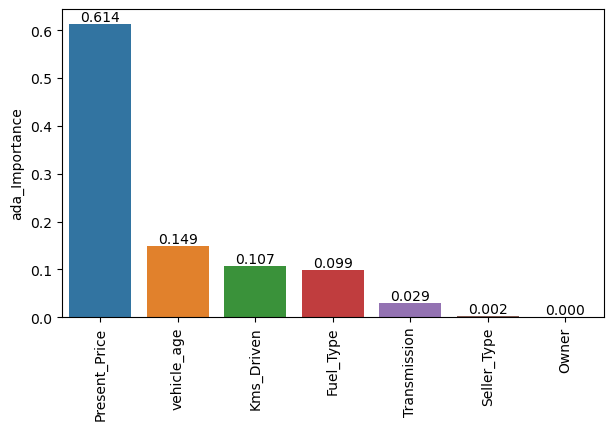

In [46]:
ax = sns.barplot(data=ada_imp_feats,
                 x=ada_imp_feats.index,
                 y='ada_Importance')

ax.bar_label(ax.containers[0], fmt="%.3f")
plt.xticks(rotation=90)
plt.show()

## Modeling with Pipeline for Gradient Boosting Regressor

In [47]:
from sklearn.ensemble import GradientBoostingRegressor

operations = [("OrdinalEncoder", column_trans),
              ("GB_model", GradientBoostingRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Fuel_Type', 'Seller_Type',
                                                   'Transmission'])],
                                   verbose_feature_names_out=False)),
                ('GB_model', GradientBoostingRegressor(random_state=101))])

```python
grad_model = GradientBoostingRegressor(random_state=101)
grad_model.fit(X_train, y_train)
```

In [48]:
# 100 -- 150 -- (-50) -- (-30) --> 150 + 0.1 *(-50) + 0.1*(-30)

# 200 -- 150 -- (50) -- (25) --> 150 + 0.1 *50 + 0.1*25

# In regression problems, the average of all observations in the data is taken. 
# The difference (residuals) between these fixed values and the actual values is calculated.
# And the model tries to bring these residuals closer to 0.

# As in classification, the residual value calculated for each tree will be multiplied by 
# the learning rate and added to the initial value to make an estimate.

# Suppose you have 2 instances in my data in the above example. Let's say the first car is 100$
# and the second car is 200$. The average value of all cars will be the starting value of the cars.
# And the values found in each tree will be added to this starting value.

In [49]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.992788,0.952247
mae,0.165700,0.353392
mse,0.052040,0.326246
rmse,0.228124,0.571180


In [50]:
operations = [("OrdinalEncoder", column_trans),
              ("GB_model", GradientBoostingRegressor(random_state=101))]

model = Pipeline(steps=operations)
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'],
                        cv=10,
                        return_train_score=True)

pd.DataFrame(scores).mean()[2:]

test_r2                              0.948530
train_r2                             0.993220
test_neg_mean_absolute_error        -0.392116
train_neg_mean_absolute_error       -0.158545
test_neg_mean_squared_error         -0.336418
train_neg_mean_squared_error        -0.048881
test_neg_root_mean_squared_error    -0.561606
train_neg_root_mean_squared_error   -0.220971
dtype: float64

## Gridsearch for Gradientboosting

In [51]:
param_grid = {"GB_model__n_estimators": [30, 35],
              "GB_model__subsample": [0.8, 1],
              "GB_model__max_features": [5, 6],
              "GB_model__learning_rate": [0.02, 0.045],
              'GB_model__max_depth': [1, 2],
              'GB_model__min_samples_split': [2, 3],
              'GB_model__min_samples_leaf': [1, 2]}

# The most important difference from classification is loss='squared_error'. In classifciation it was logloss.

In [52]:
operations = [("OrdinalEncoder", column_trans),
              ("GB_model", GradientBoostingRegressor(random_state=101))]

model = Pipeline(steps=operations)

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs=-1,
                          return_train_score=True)

In [53]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Fuel_Type',
                                                                          'Seller_Type',
                                                                          'Transmission'])],
                                                          verbose_feature_names_out=False)),
                                       ('GB_model',
                                        GradientBoostingRegressor(random_state=101))]),
             n_jobs=-1,
             param_grid={'GB_model__learning_rate': [0.02, 0.045],
                         'GB_model__max_depth': [1, 2],
                         'GB_model__max_features': [5, 6],
                         'GB_model__min_samples_leaf': [1, 2],
                         'GB_model__min_samples_split': [2, 3],
                         'GB_model__n_estimators': [30, 35],
                         'GB_model__subsample': [0.8, 1]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [54]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Fuel_Type', 'Seller_Type',
                                                   'Transmission'])],
                                   verbose_feature_names_out=False)),
                ('GB_model',
                 GradientBoostingRegressor(learning_rate=0.045, max_depth=2,
                                           max_features=6, min_samples_leaf=2,
                                           n_estimators=35, random_state=101,
                                           subsample=0.8))])

In [55]:
(pd.DataFrame(grid_model.cv_results_)
 .loc[grid_model.best_index_, ["mean_test_score", "mean_train_score"]])

mean_test_score     -1.08179
mean_train_score   -1.037296
Name: 122, dtype: object

In [56]:
prediction = grid_model.predict(X_test)

gradient_rmse = mean_squared_error(y_test, prediction, squared=False)

train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.849037,0.877428
mae,0.767618,0.769912
mse,1.089277,0.837416
rmse,1.043684,0.915105


In [57]:
operations = [("OrdinalEncoder", column_trans),
              ("GB_model", GradientBoostingRegressor(learning_rate=0.045,
                                                     max_depth=2,
                                                     max_features=6,
                                                     n_estimators=35,
                                                     random_state=101,
                                                     subsample=0.8,
                                                     min_samples_leaf=2))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'],
                        cv=10,
                        return_train_score=True)
pd.DataFrame(scores).mean()[2:]

test_r2                              0.832959
train_r2                             0.850787
test_neg_mean_absolute_error        -0.812487
train_neg_mean_absolute_error       -0.767679
test_neg_mean_squared_error         -1.221213
train_neg_mean_squared_error        -1.076396
test_neg_root_mean_squared_error    -1.081790
train_neg_root_mean_squared_error   -1.037296
dtype: float64

## Feature importance

In [58]:
operations = [("OrdinalEncoder", column_trans),
              ("GB_model", GradientBoostingRegressor(learning_rate=0.045,
                                                     max_depth=2,
                                                     max_features=6,
                                                     n_estimators=35,
                                                     random_state=101,
                                                     subsample=0.8,
                                                     min_samples_leaf=2))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Fuel_Type', 'Seller_Type',
                                                   'Transmission'])],
                                   verbose_feature_names_out=False)),
                ('GB_model',
                 GradientBoostingRegressor(learning_rate=0.045, max_depth=2,
                                           max_features=6, min_samples_leaf=2,
                                           n_estimators=35, random_state=101,
                                           subsample=0.8))])

In [59]:
pipe_model["GB_model"].feature_importances_

array([0.        , 0.25736683, 0.        , 0.62505946, 0.01989459,
       0.        , 0.09767912])

In [60]:
imp_feats = pd.DataFrame(data=pipe_model["GB_model"].feature_importances_,
                         columns=['grad_Importance'],
                         index=features)
grad_imp_feats = imp_feats.sort_values('grad_Importance', ascending=False)
grad_imp_feats

,grad_Importance
Present_Price,0.625059
Seller_Type,0.257367
vehicle_age,0.097679
Kms_Driven,0.019895
Fuel_Type,0.000000
Transmission,0.000000
Owner,0.000000


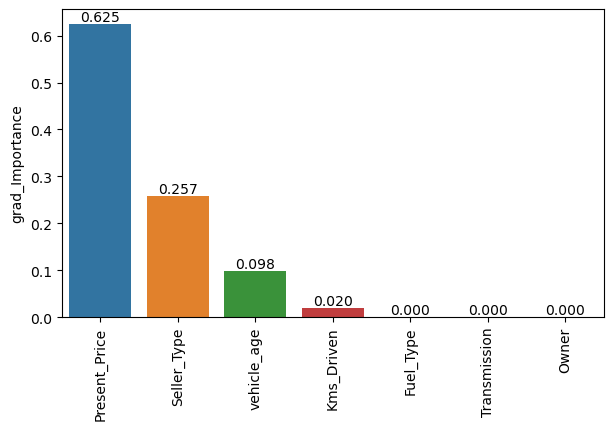

In [61]:
ax = sns.barplot(data=grad_imp_feats,
                 x=grad_imp_feats.index,
                 y='grad_Importance')

ax.bar_label(ax.containers[0], fmt="%.3f")
plt.xticks(rotation=90)
plt.show()

## Modeling with Pipeline for XG Boost Regressor

In [62]:
import xgboost as xgb

xgb.__version__

'1.7.4'

In [63]:
from xgboost import XGBRegressor

operations = [("OrdinalEncoder", column_trans),
              ("XGB_model", XGBRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

# In classification it is objective='binary:logistic' and in regression it is 'reg:squarederror'.
# Other parameters are the same as classification.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Fuel_Type', 'Seller_Type',
                                                   'Transmission'])],
                                   verbose_feature_names_out=False)),
                ('XGB_model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, co...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=101, ...))])

```python
xgb_model = XGBRegressor(random_state=101)
xgb_model.fit(X_train, y_train)
```

In [64]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.999995,0.951623
mae,0.003799,0.362840
mse,0.000035,0.330514
rmse,0.005921,0.574903


In [65]:
operations = [("OrdinalEncoder", column_trans),
              ("XGB_model", XGBRegressor(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'],
                        cv=10,
                        return_train_score=True)
pd.DataFrame(scores).iloc[:, 2:].mean()

# looks like it's overfitting.

test_r2                              0.937436
train_r2                             0.999998
test_neg_mean_absolute_error        -0.429135
train_neg_mean_absolute_error       -0.002617
test_neg_mean_squared_error         -0.417644
train_neg_mean_squared_error        -0.000015
test_neg_root_mean_squared_error    -0.625740
train_neg_root_mean_squared_error   -0.003834
dtype: float64

## Gridsearch for XGBoost

In [66]:
param_grid = {"XGB_model__n_estimators": [30, 35],
              "XGB_model__max_depth": [2, 3],
              "XGB_model__learning_rate": [0.055, 0.06],
              "XGB_model__subsample": [0.5, 0.8],
              "XGB_model__colsample_bytree": [0.5, 0.8, 1],
              "XGB_model__colsample_bylevel": [0.5, 0.8, 1]
              }

In [67]:
operations = [("OrdinalEncoder", column_trans),
              ("XGB_model", XGBRegressor(random_state=101))]

model = Pipeline(steps=operations)

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs=-1,
                          return_train_score=True)

In [68]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Fuel_Type',
                                                                          'Seller_Type',
                                                                          'Transmission'])],
                                                          verbose_feature_names_out=False)),
                                       ('XGB_model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=N...
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bylevel': [0.5, 0.8, 1],
                         'XGB_model__colsample_bytree': [0.5, 0.8, 1],
                         'XGB_model__learning_rate': [0.055, 0.06],
                         'XGB_model__max_depth': [2, 3],
                         'XGB_model__n_estimators': [30, 35],
                         'XGB_model__subsample': [0.5, 0.8]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [69]:
grid_model.best_params_

{'XGB_model__colsample_bylevel': 1,
 'XGB_model__colsample_bytree': 1,
 'XGB_model__learning_rate': 0.06,
 'XGB_model__max_depth': 3,
 'XGB_model__n_estimators': 35,
 'XGB_model__subsample': 0.5}

In [70]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Fuel_Type', 'Seller_Type',
                                                   'Transmission'])],
                                   verbose_feature_names_out=False)),
                ('XGB_model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=1, colsa...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.06,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=35,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=101, ...))])

In [71]:
(pd.DataFrame(grid_model.cv_results_)
 .loc[grid_model.best_index_, ["mean_test_score", "mean_train_score"]])

# no overfiting.

mean_test_score    -0.887809
mean_train_score   -0.800187
Name: 142, dtype: object

In [72]:
prediction = grid_model.predict(X_test)

xgb_rmse = mean_squared_error(y_test, prediction, squared=False)

train_val(grid_model, X_train, y_train, X_test, y_test)
# We do not approve this model because the average of the test data and the validation set scores
# we got from the CV is not consistent.

,train,test
R2,0.914400,0.928814
mae,0.494204,0.491760
mse,0.617648,0.486346
rmse,0.785906,0.697385


## Feature importance

In [73]:
operations = [("OrdinalEncoder", column_trans),
              ("XGB_model", XGBRegressor(n_estimators=35,
                                         learning_rate=0.06,
                                         max_depth=3,
                                         subsample=0.5,
                                         random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Fuel_Type', 'Seller_Type',
                                                   'Transmission'])],
                                   verbose_feature_names_out=False)),
                ('XGB_model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, co...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.06,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=35,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=101, ...))])

In [74]:
pipe_model["XGB_model"].feature_importances_

array([0.08241928, 0.20628503, 0.0428144 , 0.5046993 , 0.05548925,
       0.        , 0.10829264], dtype=float32)

In [75]:
features

array(['Fuel_Type', 'Seller_Type', 'Transmission', 'Present_Price',
       'Kms_Driven', 'Owner', 'vehicle_age'], dtype=object)

In [76]:
imp_feats = pd.DataFrame(data=pipe_model["XGB_model"].feature_importances_,
                         columns=['xgb_Importance'],
                         index=features)

xgb_imp_feats = imp_feats.sort_values('xgb_Importance', ascending=False)
xgb_imp_feats

,xgb_Importance
Present_Price,0.504699
Seller_Type,0.206285
vehicle_age,0.108293
Fuel_Type,0.082419
Kms_Driven,0.055489
Transmission,0.042814
Owner,0.000000


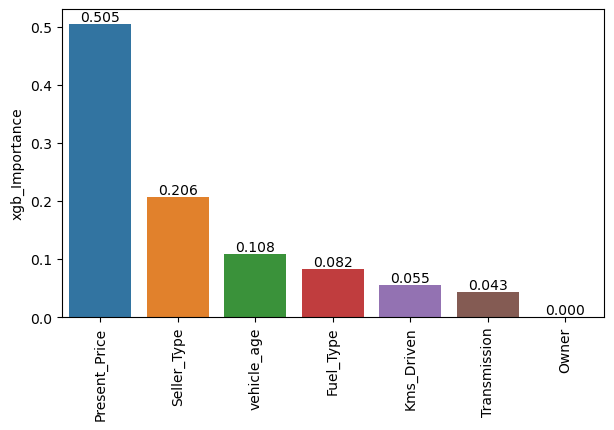

In [77]:
ax = sns.barplot(data=xgb_imp_feats,
                 x=xgb_imp_feats.index,
                 y='xgb_Importance')

ax.bar_label(ax.containers[0], fmt="%.3f")
plt.xticks(rotation=90)
plt.show()

## Feature importance comparison

In [78]:
pd.concat([xgb_imp_feats, grad_imp_feats, ada_imp_feats], axis=1)

,xgb_Importance,grad_Importance,ada_Importance
Present_Price,0.504699,0.625059,0.613594
Seller_Type,0.206285,0.257367,0.002163
vehicle_age,0.108293,0.097679,0.148628
Fuel_Type,0.082419,0.000000,0.098880
Kms_Driven,0.055489,0.019895,0.107423
Transmission,0.042814,0.000000,0.029310
Owner,0.000000,0.000000,0.000003


## compare scores

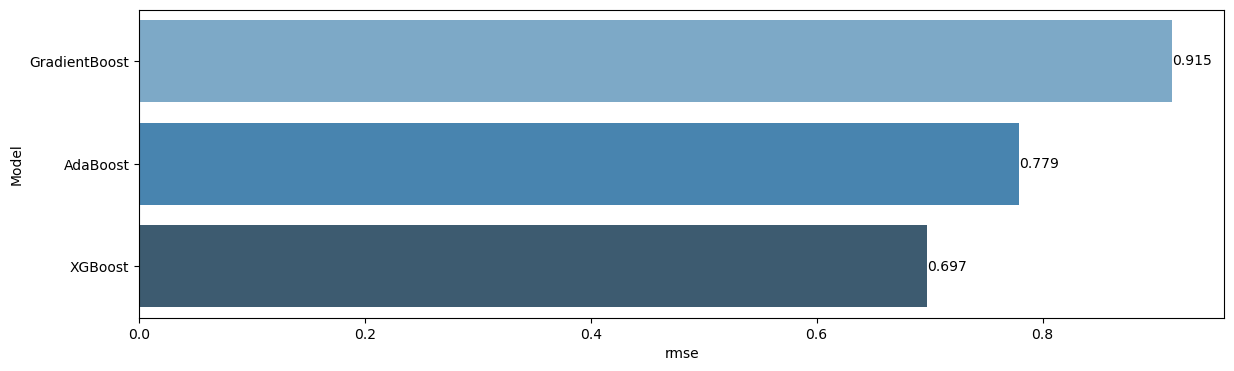

In [80]:
compare = pd.DataFrame({"Model": ["AdaBoost", "GradientBoost", "XGBoost"],
                        "rmse": [ada_rmse, gradient_rmse, xgb_rmse]})

plt.figure(figsize=(14, 4))

compare = compare.sort_values(by="rmse", ascending=False)
ax = sns.barplot(x="rmse",
                 y="Model",
                 data=compare,
                 palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

In [81]:
# According to the rmse scores above, XGBoost seems to be the best score, but it is not consistent with 
# the scores obtained in CV. We prefer adaboost because adaboost gives the most consistent score with CV.

## Final Model

In [82]:
cat

['Fuel_Type', 'Seller_Type', 'Transmission']

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value',
                         unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat),
                                       remainder='passthrough',
                                       verbose_feature_names_out=False).set_output(transform="pandas")

base_estimator = DecisionTreeRegressor(max_depth=2)

operations = [("OrdinalEncoder", column_trans),
              ("Ada_model", AdaBoostRegressor(estimator=base_estimator,
                                              loss='square',
                                              n_estimators=150,
                                              random_state=101))]

pipe_model = Pipeline(steps=operations)
pipe_model.fit(X, y)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Fuel_Type', 'Seller_Type',
                                                   'Transmission'])],
                                   verbose_feature_names_out=False)),
                ('Ada_model',
                 AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=2),
                                   loss='square', n_estimators=150,
                                   random_state=101))])

In [85]:
pipe_model["OrdinalEncoder"].fit_transform(X).head()

,Fuel_Type,Seller_Type,Transmission,Present_Price,Kms_Driven,Owner,vehicle_age
0,2.0,0.0,1.0,5.59,27000,0,8
1,1.0,0.0,1.0,9.54,43000,0,9
2,2.0,0.0,1.0,9.85,6900,0,5
3,2.0,0.0,1.0,4.15,5200,0,11
4,1.0,0.0,1.0,6.87,42450,0,8


## Prediction

In [86]:
samples = {"Present_Price": [7, 9.5],
           "Kms_Driven": [25000, 44000],
           "Fuel_Type": ["Petrol", "Diesel"],
           'Seller_Type': ['Dealer', 'Individual'],
           'Transmission': ['Manual', 'Automatic'],
           "Owner": [0,1],
           "vehicle_age": [1, 9]}

In [87]:
df_samples = pd.DataFrame(samples)
df_samples

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,7.0,25000,Petrol,Dealer,Manual,0,1
1,9.5,44000,Diesel,Individual,Automatic,1,9


In [88]:
pipe_model.predict(df_samples)

array([5.73593023, 5.1265812 ])